#### 예제
1. csv폴더 안에 card 폴더에 있는 '오프라인.csv' 파일 로드 
2. 컬럼의 이름을 변경 -> ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 결측치가 존재하는가? 
4. 기준년월 데이터를 시계열 데이터로 변경 
5. 남, 여 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인가?
    - 기준년이라는 컬럼을 생성하여 기준년월에서 년도만 추출
    - 건당 이용금액 컬럼을 생성하여 총이용금액 / 총이용건수
    - groupby(), pivot_table()

In [ ]:
import pandas as pd

In [ ]:
## 데이터파일 로드 
offline = pd.read_csv("../../csv/card/오프라인.csv", encoding='cp949')

In [ ]:
offline.info()

In [ ]:
## 컬럼의 이름을 변경 
## rename()
offline.rename(
    columns = {
        'crym' : '기준년월', 
        'tco_btc_nm' : '업종', 
        'ma_fem_dc' : '성별', 
        'agegrp_dc' : '연령대', 
        'tco_btc_u_ct' : '총이용건수', 
        'tco_btc_u_am' : '총이용금액'
    }
)

In [ ]:
## DataFrame 안에 columns 변수를 변경
offline.columns = ['기준년월', '업종', '성별', '연령대', 
                   '총이용건수', '총이용금액']

In [ ]:
# 결측치를 확인 
offline.isna().sum()

In [ ]:
# 성별 데이터에서 값들의 빈도수 확인 
offline['성별'].value_counts()

In [ ]:
offline['연령대'].value_counts()

In [ ]:
offline.head()

In [ ]:
## 기준년월 데이터를 시계열로 변경 
offline['기준년월'] =\
    pd.to_datetime(offline['기준년월'], format='%Y%m')

In [ ]:
offline.info()

In [ ]:
# 기준년 컬럼을 생성
offline['기준년'] = offline['기준년월'].dt.strftime('%Y')

In [ ]:
# 건당이용금액 컬럼을 생성 
offline['건당이용금액'] = offline['총이용금액'] / offline['총이용건수']

In [ ]:
offline.head()

In [ ]:
group_data = offline[['성별', '기준년', '건당이용금액']].groupby(
    ['성별', '기준년']).mean()

In [ ]:
pivot_data = offline.pivot_table(
    index = '성별', 
    columns= '기준년', 
    values = '건당이용금액', 
    aggfunc= 'mean'
)

In [ ]:
group_data.plot(kind='bar')

In [ ]:
pivot_data.plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt
import platform

In [ ]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [ ]:
# index를 column으로 이동 : unstack()
group_data.unstack().plot(kind='bar')

In [ ]:
# column을 index로 이동 : stack()
group_data.stack()

In [41]:
## 컬럼의 데이터를 인덱스로 변경 
## 설정하다(set) + 인덱스(index) -> set_index()
offline.set_index('기준년월', inplace=True)

In [48]:
## 기준년월별 총 이용금액의 합계를 그래프로 시작화 
## 그룹화 
group_data2 =\
    offline[['업종','총이용금액']].groupby(['기준년월', '업종']).sum()

In [ ]:
group_data2.unstack().plot()

In [51]:
pivot_data2 = offline.pivot_table(
    index = '기준년월', 
    columns = '업종', 
    values = '총이용금액', 
    aggfunc= 'sum'
)

<AxesSubplot: xlabel='기준년월'>

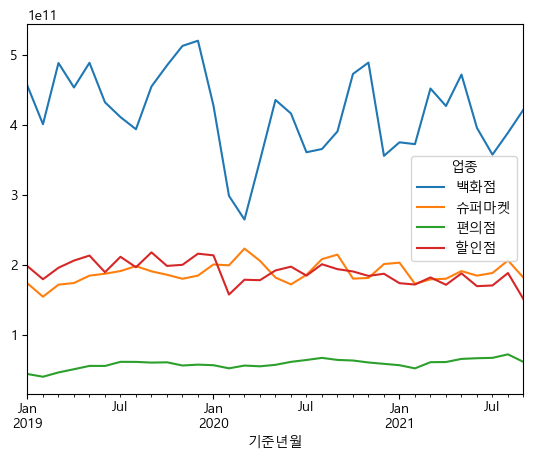

In [56]:
pivot_data2.plot()